In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
classes = ["person", "vest", "glass", "head", "red", "yellow", "blue", "white"]
class DataInfo:
    def __init__(self, labels_path):
        self.labels_path = labels_path
        self.files = os.listdir(self.labels_path)
        self.output = None

        values = {}
        for file in self.files:
            if os.path.splitext(file)[1] == ".txt":
                try:
                    f = open(f"{self.labels_path}/{file}", "r").read()
                except FileNotFoundError:
                    continue
                
                for i in f.split('\n'):
                    if i != '':
                        value = i.split()[0]
                        if value not in values:
                            values.update({value: 1})
                        else:
                            values[str(value)] += 1
        self.output = sorted(values.items(), key= lambda x: x[1])
        self.output = [(classes[int(x[0])], x[1]) for x in self.output]
        indexes = [x[0] for x in self.output]
        instances = [x[1] for x in self.output]
        self.output = pd.DataFrame(instances, columns=["number of instances"], index=indexes)

    def info(self):
        print(self.output)
        print("Total labels", len(self.files))
    
    def plot(self, exclude:list=None):
        if exclude:
            self.output = self.output.drop(exclude)
        self.output.plot.bar()

### 1. Info for the dataset without modifications

In [11]:
without_mods = DataInfo("./datasets/yolo - Without modifications/CHVG-Dataset/labels/train")
without_mods.info()

        number of instances
red                     385
blue                    422
glass                   514
head                    693
yellow                  887
white                  1045
vest                   1740
person                 3720
Total labels 1359


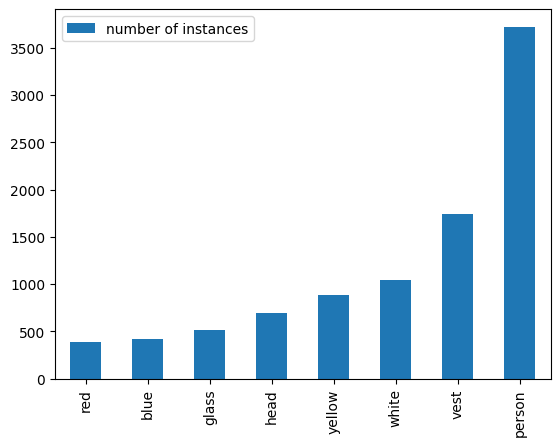

In [12]:
without_mods.plot()

### 2. Info for yolov1 dataset

In [13]:
yolov1 = DataInfo("./datasets/yolov1/CHVG-Dataset/labels/train")
yolov1.info()

        number of instances
glass                  1086
blue                   1289
red                    2028
head                   2404
white                  3195
yellow                 3740
vest                   5289
person                14388
Total labels 4893


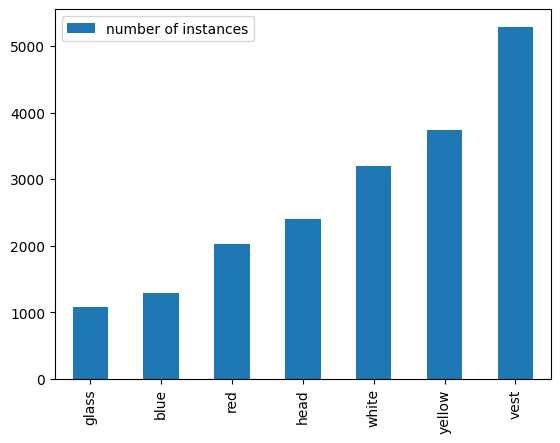

In [14]:
yolov1.plot("person")

### 3. Info for yolov2 dataset 

In [15]:
yolov2 = DataInfo("./datasets/yolov2/CHVG-Dataset/labels/train")
yolov2.info()

        number of instances
glass                   672
blue                    790
red                    1397
white                  1595
head                   2027
yellow                 2133
vest                   2673
person                 8347
Total labels 2699


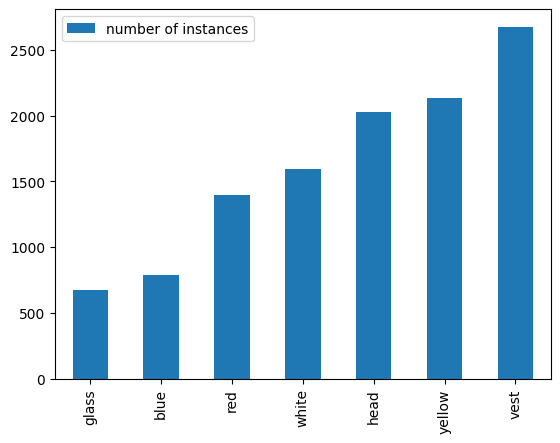

In [16]:
yolov2.plot("person")

### 4. Info for yolov3 dataset 
This dataset contains the original dataset + 1554 images from this dataset https://universe.roboflow.com/jeremy-gaish/ppe-omaft-tw2qw-qlg1b

In [17]:
yolov3 = DataInfo("./datasets/yolov3/CHVG-Dataset/labels/train")
yolov3.info()

        number of instances
glass                   673
blue                    799
red                    1518
white                  1626
head                   2228
yellow                 2262
vest                   2657
person                 8850
Total labels 2913


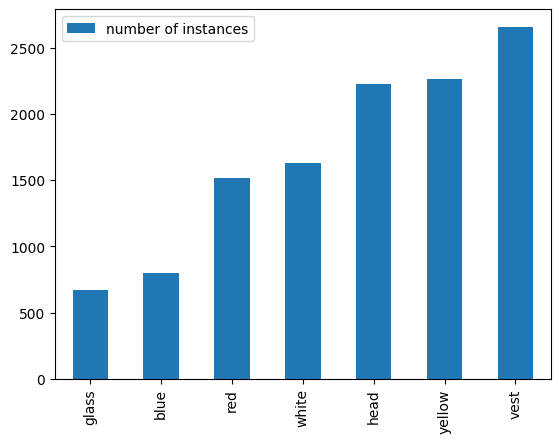

In [18]:
yolov3.plot("person")

### 5. Info for v5
original dataset + 1554 images 

In [19]:
train_v5 = DataInfo("./datasets/v5/CHVG-Dataset/labels/train")
test_v5 = DataInfo("datasets/v5/CHVG-Dataset/labels/test")

### 5.1 v5 train info

In [20]:
train_v5.info()

        number of instances
glass                  2164
blue                   3016
red                    5112
white                  5980
head                   7428
yellow                 8380
vest                   9916
person                31620
Total labels 10408


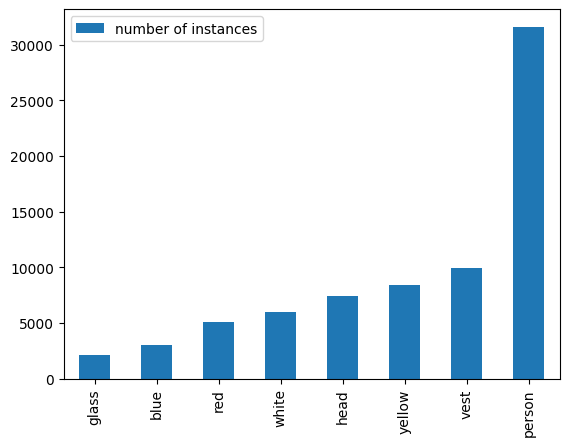

In [21]:
train_v5.plot()

### 5.2 v5 test info
Note this dataset is splitted based on the number of the original images (without the augmented images) with ration of 0.2 for the test set. This is to make sure the model doesn't cheat from similar images that might be on the test set when some augmented images are there.

In [22]:
test_v5.info()

        number of instances
glass                   150
blue                    166
red                     351
white                   378
head                    408
yellow                  480
vest                    575
person                 1899
Total labels 651


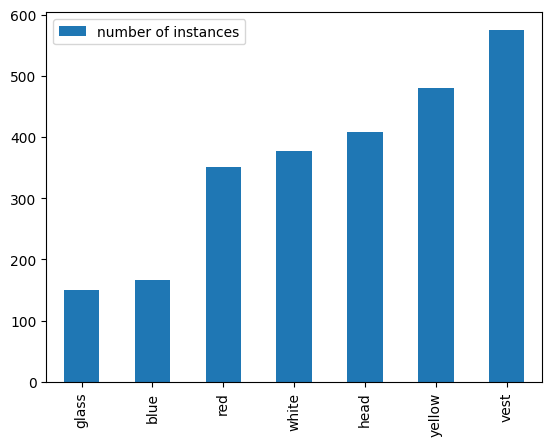

In [23]:
test_v5.plot("person")

### 6. v7 With noise

In [27]:
v7 = DataInfo("./datasets/v7-with-noise/CHVG-Dataset/labels/train")

In [28]:
v7.info()

        number of instances
glass                  4325
blue                   6032
red                   10221
white                 11960
head                  14856
yellow                16760
vest                  19829
person                63237
Total labels 20818


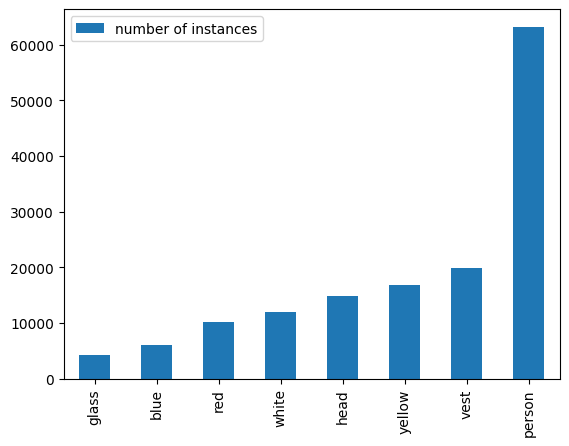

In [29]:
v7.plot()

### 7. v5-balanced

In [3]:
v5_balanced = DataInfo("./datasets/v5-balanced/CHVG-Dataset/labels/train")

In [4]:
v5_balanced.info()

        number of instances
glass                  2163
blue                   3016
red                    5111
white                  5980
head                   5997
yellow                 6000
vest                   6000
person                31619
Total labels 10408


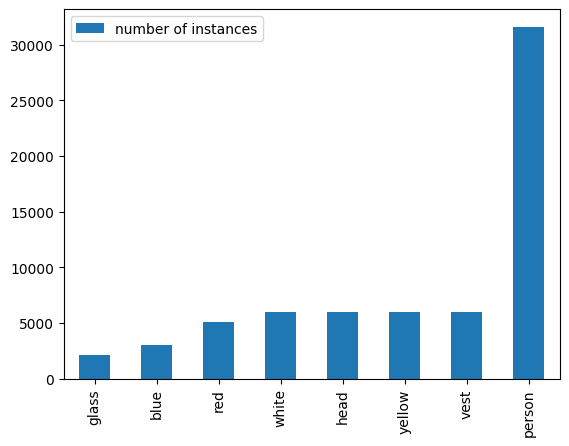

In [5]:
v5_balanced.plot()